## Primeiros passsos

In [74]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from random import randint


In [5]:
#criando dataframe aleatorio
#1 definindo as datas

datas=pd.date_range(start='1/1/2022', end='12/31/2022', freq='D')

#2 criando dados aleatorios

dados=np.random.randint(0,100, size=(len(datas), 4))

#3 criando as colunas

colunas =['A','B','C','D']

#4 Criando DATAFRAME

df=pd.DataFrame(dados, index=datas, columns= colunas)

print(df.head())

             A   B   C   D
2022-01-01  35  18  76  71
2022-01-02  58  89  86  77
2022-01-03   0  99  83  47
2022-01-04  16  34  18  87
2022-01-05  56   6  11  32


Existem duas formas de chamar visualizações de dados utilizando o pandas:
- método kind: df.plot(kind= 'line'), onde kind refere-se ao tipo de gráfico
- método direto: __df.plot.line()__

Para listar todos os tipos de gráficos disponibilizadas pela biblioteca pandas, basta digitar __df.plot__. e clicar em tab para ele exibir uma lista com todos gráficos disponíveis. Muito programadores preferem o método direto pois facilita a autocompletação de código com IDES que forncecem esse suporte.


## 1.Gráfico de linhas

<Axes: title={'center': 'Gráfico de Linhas'}>

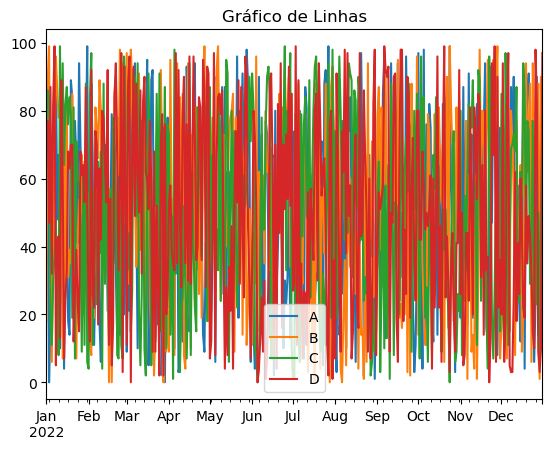

In [15]:
df.plot.line(title='Gráfico de Linhas')

Ao chamar um gráfico direto, será exibido um gráfico extretamente confuso, pois está exibindo todos os dados contidos em todas colunas. Então é importante, especificar quais parâmetros ou categorias você está querendo visulizar. Por exemplo, vamos verificar apenas a série temporal da categoria A.

<Axes: title={'center': 'Gráfico de linhas da coluna A'}>

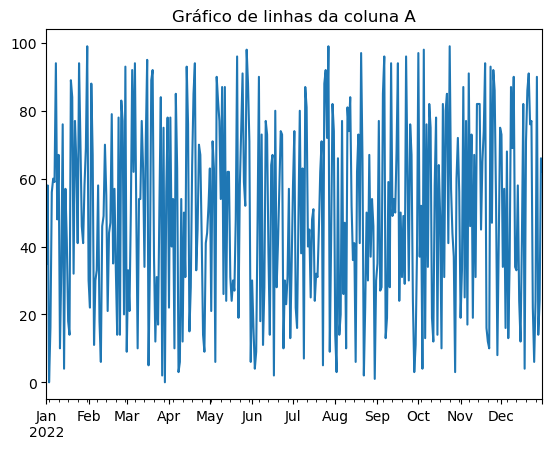

In [22]:
df['A'].plot.line(title= 'Gráfico de linhas da coluna A')

Também é possível visualizar outras categorias conjuntamente, basta informá-las em forma de listas.

<Axes: title={'center': 'Gráfico de linhas das colunas A e D'}>

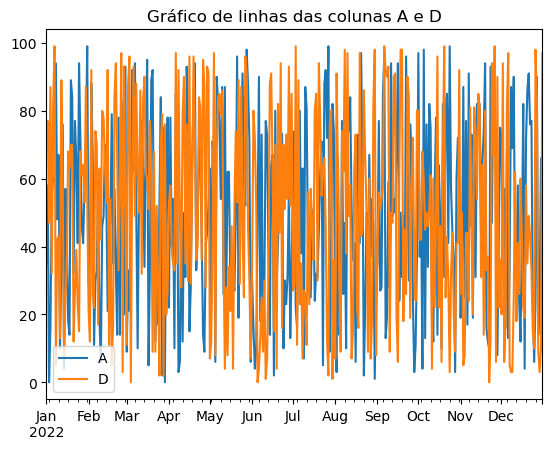

In [21]:
df[['A','D']].plot.line(title='Gráfico de linhas das colunas A e D')

## 2. Gráfico de Área



<Axes: >

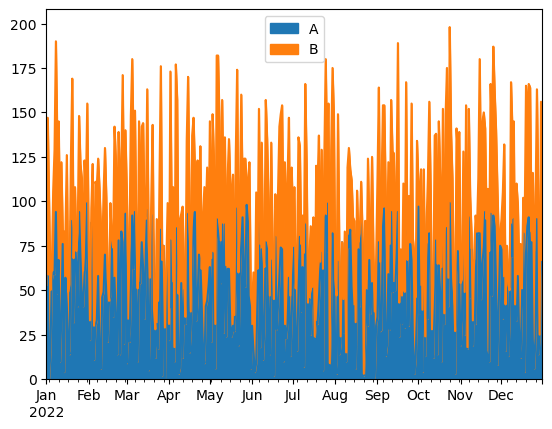

In [27]:
df[['A','B']].plot.area() #caso deseja que os dados não sejam  empilhas, tente adicionar (stacked= false)

## 2. Gráficos de Bar e Barh
Úteis para comparar categorias.


<Axes: >

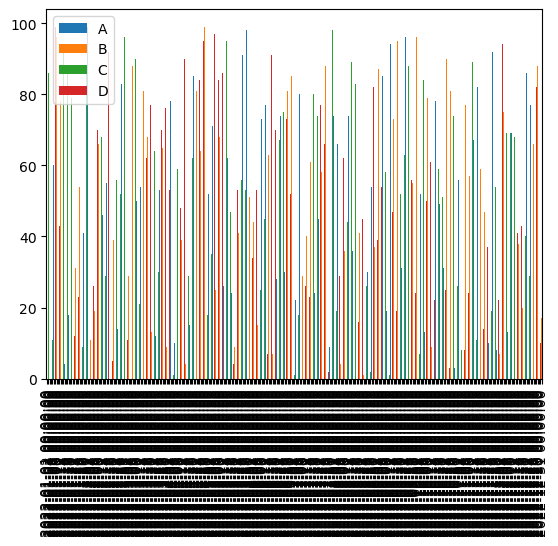

In [33]:
df.plot.bar()


Nesse caso especificamente, como o dataframe que criamos aleatóriamente  freq='D' para criarmos uma série temporal, os rótulos que estão sendo exibidos no Eixo x é todos indices para cada dia do ano (365 dias. E como o pandas tenta criar uma barra para cada dia e rotular cada barra com a data correspondente, acaba parecendo gerando esse amontoado de linhas pretas.

Uma forma de contornar isso, é exibir isso é uma frequência menor como a mensal

<Axes: >

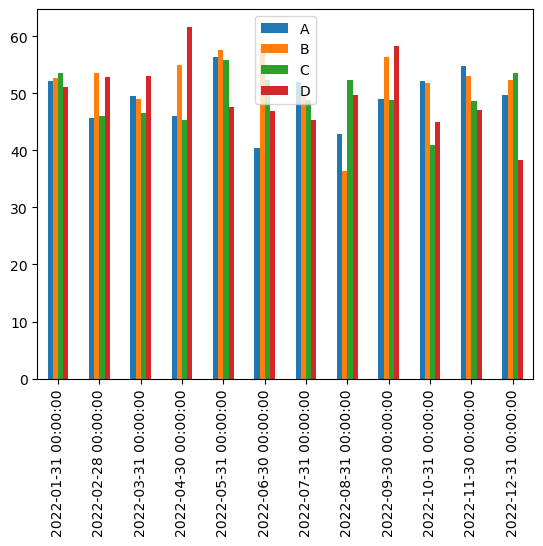

In [45]:
df.resample('M').mean().plot.bar()


Para agrupar dados não temporais, utilizamos a função 'Group by'. Esta função permite classificar dados de acordo com uma determinada categoria. Também é possível aplicar funções de agregação, como a média, para resumir esses grupos de dados.

Por outro lado, quando lidamos com séries temporais, a abordagem é um pouco diferente. Usamos a função 'Resample', que é basicamente uma maneira de fazer uma amostragem dos dados baseada no tempo. Isso significa que os dados são agrupados em intervalos regulares de tempo, como dia, mês, etc. Assim como no caso do 'Group by', também podemos aplicar funções de agregação para resumir esses grupos de dados.

<Axes: >

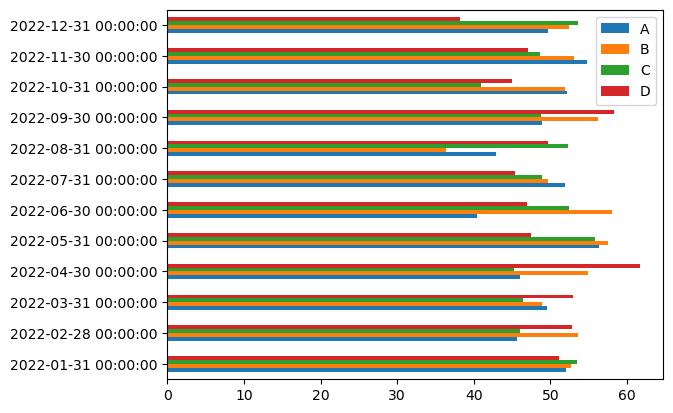

In [44]:
df.resample('M').mean().plot.barh() #barh inverte o eixo

## 4.Densidade ou gráfico KDE
De maneira geral, o gráfico de densidade KDE possibilita a visualização da distribuição de dados por meio de uma curva suavizada, ao invés convecional histograma.

<Axes: title={'center': 'Distribuição de dados da Categoria A'}, ylabel='Density'>

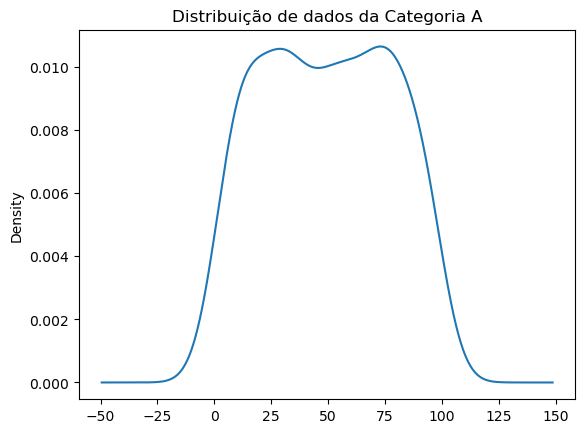

In [51]:
df['A'].plot.kde(title='Distribuição de dados da Categoria A')

## 5. Gráfico de Histograma
Histograma também permite visualizar a distribuição dos Dados. Ele pode ajudar a responder perguntas como: Os dados são normalmente distribuídos? Existe alguma assimetria nos dados? Existem outliers perceptíveis? Contudo, para esse tipo de dados ele não vai muito interessante, pois os dados foram gerados aleatoriamente a partir de uma distribuição uniforme, o que significa que cada número entre 0 e 100 tem a mesma probabilidade de ser escolhido. Portanto não devemos esperar ver uma distribuição normal

<Axes: ylabel='Frequency'>

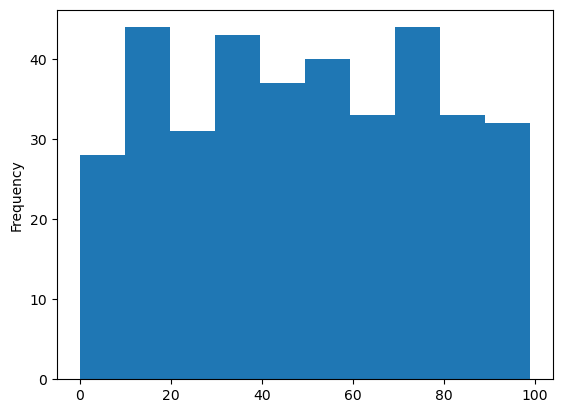

In [60]:
df['A'].plot.hist()

## 6. Gráfico de Dispersão
Esse gráfico ajuda entender a correlação entre duas variáveis, outliers.



<Axes: xlabel='A', ylabel='D'>

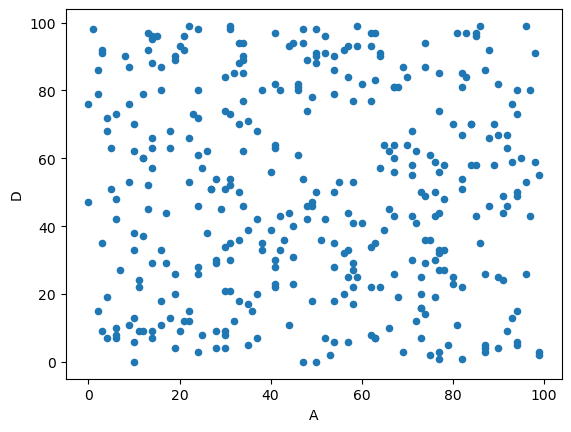

In [62]:
df.plot.scatter(x= 'A', y='D')

## 7.Gráfico de Caixa
Boxplot também é outra forma de visualizar a distribuição dos dados e  apresenta várias estatísticas descritivas, incluindo a mediana.

<Axes: >

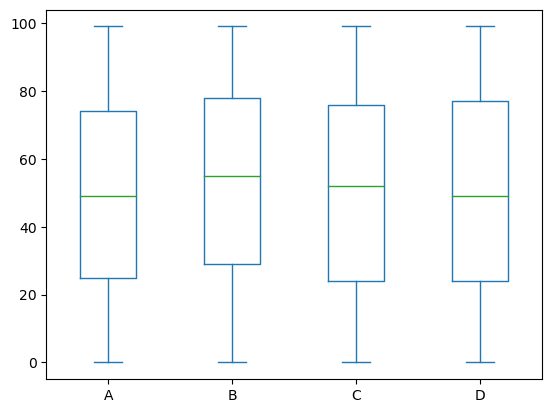

In [63]:
df.plot.box()

## 8. Gráfico de Hexbin

Para um conjunto de Dados muito grandes, o hexbin é uma alternativa ao gráfico de dispersão convecional, pois ele resolve os problemas de overploting que dificultam a identificar padrões.

<Axes: xlabel='A', ylabel='D'>

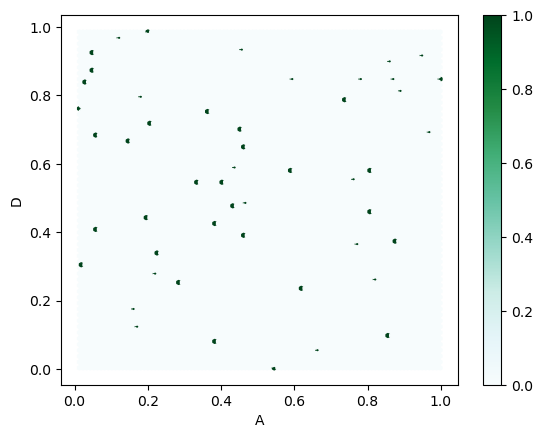

In [65]:
df.plot.hexbin(x='A', y='D')


Como podmos ver, nosso dataframe não é grande suficiente, mas podemos criar uma aleatório para demonstrar

<Axes: xlabel='a', ylabel='b'>

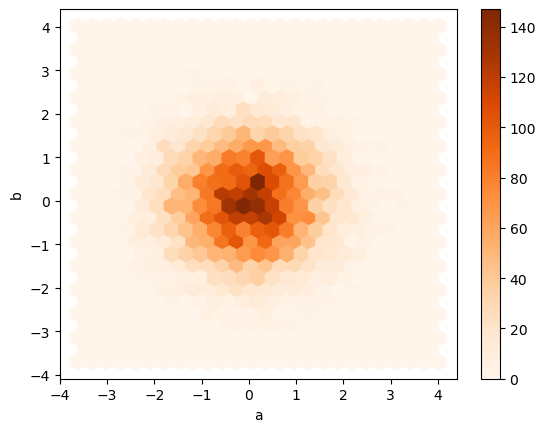

In [67]:

df = pd.DataFrame(np.random.randn(10000, 2), columns=['a', 'b'])

df.plot.hexbin(x='a', y='b', gridsize=25, cmap='Oranges')


## 9.Gráfico de Pizza

Gráficos de pizza são usados para representar valores categóricos e não númericos, pois são utilizados para visualizar proporções de categorias em um todo e são amplamente desaconselháveis por diversas vezes não ser a melhor forma de visualizar esses dados.

Para fim de exemplificação, iremos somar os valores de cada categoria e utilizar o matplotlib para criar a visualização.

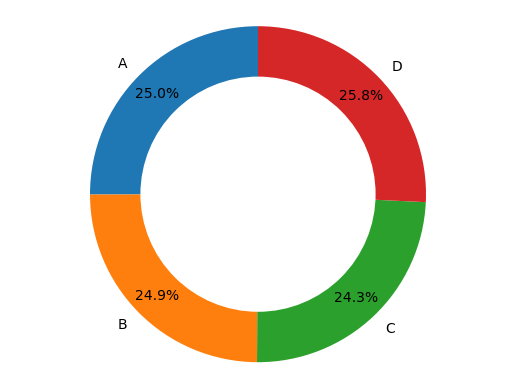

In [77]:


# Somando os valores de cada coluna
sums = df.sum()

# Criando o gráfico de rosquinha
sums.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Desenhando círculo branco no meio
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# garantindo que o gráfico seja desenhado como um círculo
plt.axis('equal')  

plt.show()


## Conclusões se houver
